# 🫐 **<span style="color: DarkGreen; font-family:Times New Roman;">Harvesting Insights: Machine Learning Models for Blueberry Yield Prediction</span>**

---


<iframe src="https://giphy.com/embed/e9q7mLbHO1LspLCVRL" width="270" height="480" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/e9q7mLbHO1LspLCVRL">via GIPHY</a></p>

<span style="padding: 10px;
              color:white;font-size:200%;
           font-family:Time News Roman; color: DarkGreen">
🪔 Please Upvote my kernel if you liked it ⬆️
</span>

---

<div style="color:white;
           display:fill;
           text-align:center;
           border-radius:5px;
           background-color:lightgreen;
           letter-spacing:0.5px">
<span style="padding: 10px;
              color:white;font-size:310%;
           font-family:Time News Roman; color: DarkGreen">
📋 Table of Contents
    </span> <a name="toc"></a>
</div>


 ## **1. [Introduction](#introduction)**
## **2. [Body](#body)**
> **2.1. [Change the theme of the notebook](#appearance)**

> **2.2. [Import important libraries, Read the data](#import)**

> **2.3. [Overview](#overview)**

> **2.4. [EDA](#eda)**

> **2.5. [Feature Engineering](#feature-engineering)**

> **2.6. [Model Selection](#model-selection)**

> **2.7. [Final Evaluation](#final-evaluation)**

> **2.8. [Result](#result)**


## **3. [Conclusion](#conclusion)**

* * *
# 📖 **<span style="color: DarkGreen; font-family:Times New Roman;">INTRODUCTION</span>** <a name="introduction"></a>
---


Welcome to my notebook for the Kaggle competition! In this notebook, I will be tackling the challenge of predicting crop yield using various machine learning techniques. The dataset provided contains valuable features such as fruit set, seeds, and weather-related variables, which are known to influence crop productivity.

I will begin by performing exploratory data analysis to gain insights into the data and understand the relationships between different variables. Next, I will preprocess the data, including scaling certain features for optimal modeling performance.

To approach the prediction task, I will experiment with three different regression models: Random Forest, Linear Regression, and XGBoost. Each model will be trained and evaluated using a 100-fold cross-validation strategy to ensure robustness and accuracy. I will assess the performance of each model based on mean absolute error (MAE) and compare the results.

Finally, I will use the best-performing model to make predictions on the test dataset and generate a submission file for the competition.

Join me on this exciting journey as we leverage machine learning techniques to forecast crop yield and contribute to the field of agriculture. Let's dive in and uncover valuable insights for optimizing agricultural productivity!"

Feel free to customize and expand upon this introduction based on the specifics of your notebook and the Kaggle competition you are participating in.

**[⬆️Back to Table of Contents ⬆️](#toc)**

* * *
# 🦴 **<span style="color: DarkGreen; font-family:Times New Roman;">BODY</span>**<a name="body"></a>
---


## 🖌️ <span style="color: DarkGreen; font-family:Times New Roman;">Change the theme of the notebook</span><a name="appearance"></a>
---


In [1]:
!wget http://bit.ly/3ZLyF82 -O appearance.css -q
    
from IPython.core.display import HTML
with open('./appearance.css', 'r') as file:
    appearance = file.read()

HTML(appearance)

**[⬆️Back to Table of Contents ⬆️](#toc)**

* * *
## 🛠️ <span style="color: DarkGreen; font-family:Times New Roman;">Import important libraries, Read the data</span> <a name="iaiil"></a>
---


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s3e14/train.csv",index_col = "id")
test = pd.read_csv("/kaggle/input/playground-series-s3e14/test.csv",index_col = "id")

In [4]:
# Decide to run the model_selection part or not
model_selection = False

# Random State
RS = 13


**[⬆️Back to Table of Contents ⬆️](#toc)**

* * *
## 👁️ <span style="color: DarkGreen; font-family:Times New Roman;">Overview</span> <a name="overview"></a>
---


In [5]:
train.shape

(15289, 17)

In [6]:
train.head()

clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
id                                                                   
0        25.0      0.50     0.25     0.75   0.50              69.7   
1        25.0      0.50     0.25     0.50   0.50              69.7   
2        12.5      0.25     0.25     0.63   0.63              86.0   
3        12.5      0.25     0.25     0.63   0.50              77.4   
4        25.0      0.50     0.25     0.63   0.63              77.4   

    MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
id                                                             
0               42.1                  58.2              50.2   
1               42.1                  58.2              50.2   
2               52.0                  71.9              62.0   
3               46.8                  64.7              55.8   
4               46.8                  64.7              55.8   

    MinOfLowerTRange  AverageOfLowerTRange  RainingDays  AverageRainingDays  \
id                                                                            
0               24.3                  41.2         24.0                0.39   
1               24.3                  41.2         24.0                0.39   
2               30.0                  50.8         24.0                0.39   
3               27.0                  45.8         24.0                0.39   
4               27.0                  45.8         24.0                0.39   

    fruitset  fruitmass      seeds       yield  
id                                              
0   0.425011   0.417545  32.460887  4476.81146  
1   0.444908   0.422051  33.858317  5548.12201  
2   0.552927   0.470853  38.341781  6869.77760  
3   0.565976   0.478137  39.467561  6880.77590  
4   0.579677   0.494165  40.484512  7479.93417

In [7]:
train.tail()

clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
id                                                                      
15284       12.5      0.25     0.25     0.38   0.50              77.4   
15285       12.5      0.25     0.25     0.25   0.50              86.0   
15286       25.0      0.50     0.25     0.38   0.75              77.4   
15287       25.0      0.50     0.25     0.63   0.63              69.7   
15288       25.0      0.50     0.25     0.63   0.50              77.4   

       MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
id                                                                
15284              46.8                  64.7              55.8   
15285              52.0                  71.9              62.0   
15286              46.8                  64.7              55.8   
15287              42.1                  58.2              50.2   
15288              46.8                  64.7              55.8   

       MinOfLowerTRange  AverageOfLowerTRange  RainingDays  \
id                                                           
15284              27.0                  45.8         16.0   
15285              30.0                  50.8         34.0   
15286              27.0                  45.8         34.0   
15287              24.3                  41.2         24.0   
15288              27.0                  45.8         16.0   

       AverageRainingDays  fruitset  fruitmass      seeds       yield  
id                                                                     
15284                0.26  0.556302   0.476308  40.546480  7667.83619  
15285                0.56  0.354413   0.388145  29.467434  3680.56025  
15286                0.56  0.422548   0.416786  32.299059  4696.44394  
15287                0.39  0.542170   0.434133  36.674243  6772.93347  
15288                0.26  0.492077   0.446576  35.094733  5867.99722

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [9]:
train.describe()

clonesize      honeybee       bumbles       andrena         osmia  \
count  15289.000000  15289.000000  15289.000000  15289.000000  15289.000000   
mean      19.704690      0.389314      0.286768      0.492675      0.592355   
std        6.595211      0.361643      0.059917      0.148115      0.139489   
min       10.000000      0.000000      0.000000      0.000000      0.000000   
25%       12.500000      0.250000      0.250000      0.380000      0.500000   
50%       25.000000      0.500000      0.250000      0.500000      0.630000   
75%       25.000000      0.500000      0.380000      0.630000      0.750000   
max       40.000000     18.430000      0.585000      0.750000      0.750000   

       MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count      15289.000000      15289.000000          15289.000000   
mean          82.169887         49.673281             68.656256   
std            9.146703          5.546405              7.641807   
min           69.700000         39.000000             58.200000   
25%           77.400000         46.800000             64.700000   
50%           86.000000         52.000000             71.900000   
75%           86.000000         52.000000             71.900000   
max           94.600000         57.200000             79.000000   

       MaxOfLowerTRange  MinOfLowerTRange  AverageOfLowerTRange   RainingDays  \
count      15289.000000      15289.000000          15289.000000  15289.000000   
mean          59.229538         28.660553             48.568500     18.660865   
std            6.610640          3.195367              5.390545     11.657582   
min           50.200000         24.300000             41.200000      1.000000   
25%           55.800000         27.000000             45.800000     16.000000   
50%           62.000000         30.000000             50.800000     16.000000   
75%           62.000000         30.000000             50.800000     24.000000   
max           68.200000         33.000000             55.900000     34.000000   

       AverageRainingDays      fruitset     fruitmass         seeds  \
count        15289.000000  15289.000000  15289.000000  15289.000000   
mean             0.324176      0.502741      0.446553     36.164950   
std              0.163905      0.074390      0.037035      4.031087   
min              0.060000      0.192732      0.311921     22.079199   
25%              0.260000      0.458246      0.419216     33.232449   
50%              0.260000      0.506600      0.446570     36.040675   
75%              0.390000      0.560445      0.474134     39.158238   
max              0.560000      0.652144      0.535660     46.585105   

              yield  
count  15289.000000  
mean    6025.193999  
std     1337.056850  
min     1945.530610  
25%     5128.163510  
50%     6117.475900  
75%     7019.694380  
max     8969.401840

In [10]:
train.dtypes

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

**[⬆️Back to Table of Contents ⬆️](#toc)**

* * *
## 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">EDA</span> <a name="eda"></a>
---


* * *
### 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">Univariate Analysis</span> <a name="univariate-analysis"></a>
---


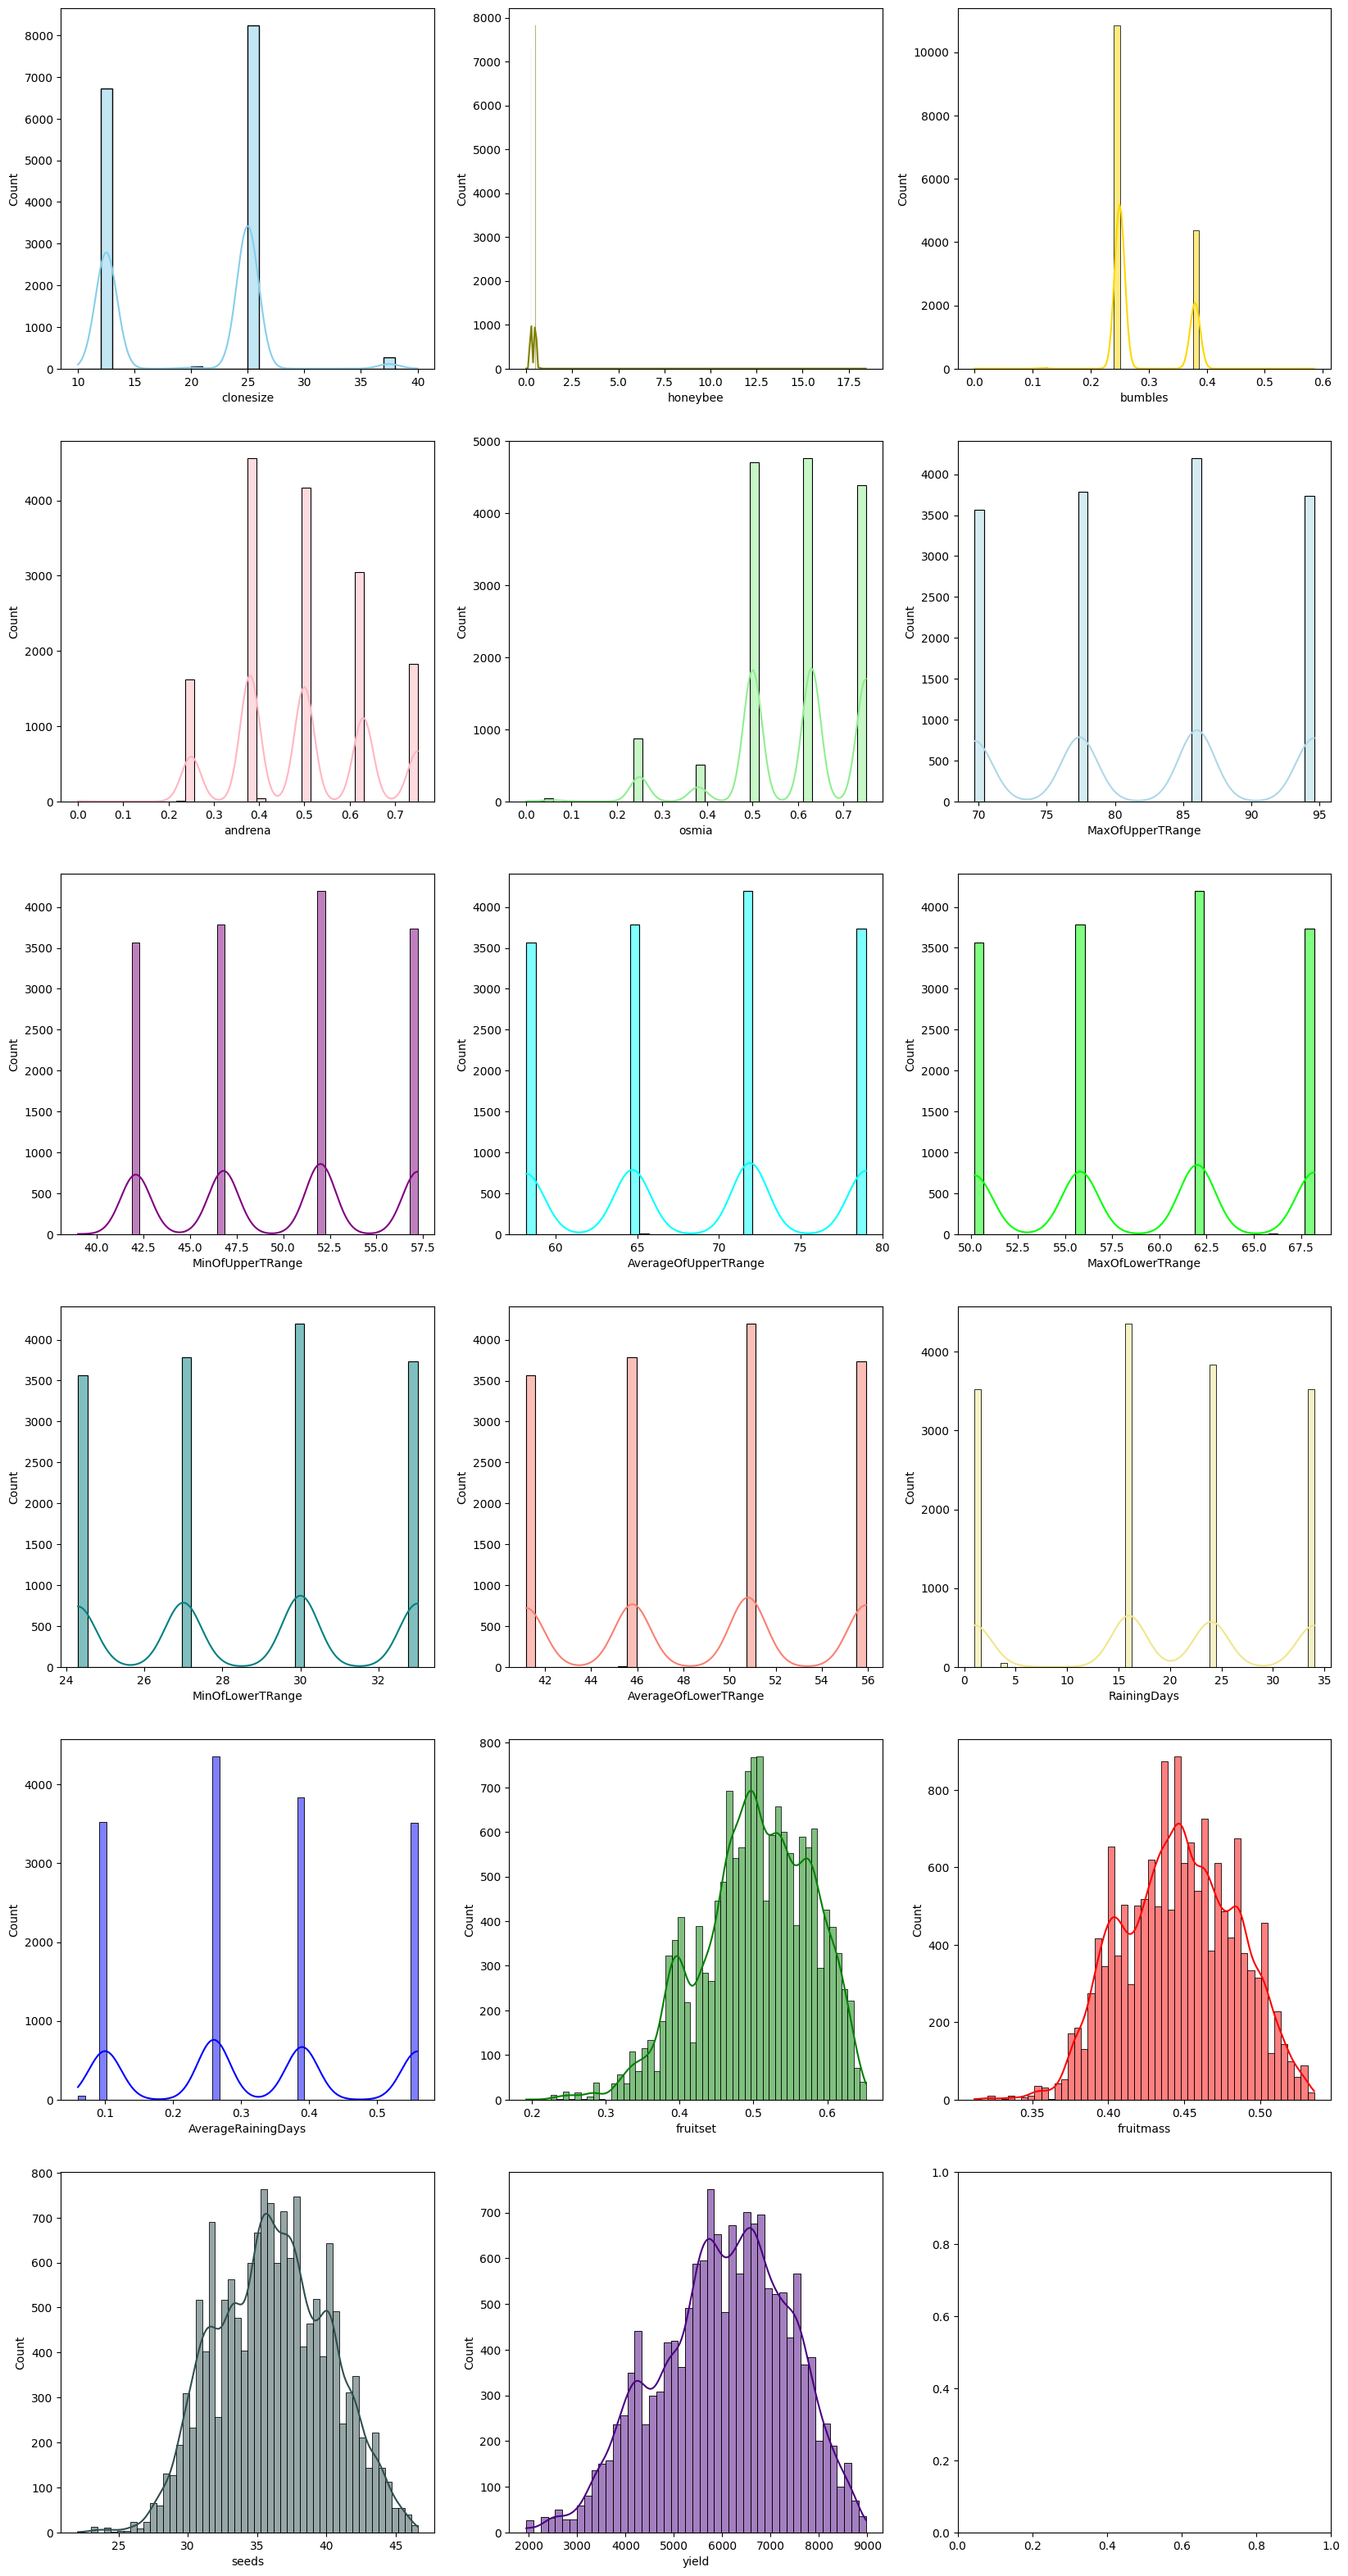

In [11]:
fig, axs = plt.subplots(6, 3, figsize=(20, 40))

sns.histplot(data = train, x = train.columns[0], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data = train, x = train.columns[1], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data = train, x = train.columns[2], kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data = train, x = train.columns[3], kde=True, color="lightpink", ax=axs[1, 0])
sns.histplot(data = train, x = train.columns[4], kde=True, color="lightgreen", ax=axs[1, 1])
sns.histplot(data = train, x = train.columns[5], kde=True, color="lightblue", ax=axs[1, 2])
sns.histplot(data = train, x = train.columns[6], kde=True, color="purple", ax=axs[2, 0])
sns.histplot(data = train, x = train.columns[7], kde=True, color="aqua", ax=axs[2, 1])
sns.histplot(data = train, x = train.columns[8], kde=True, color="lime", ax=axs[2, 2])
sns.histplot(data = train, x = train.columns[9], kde=True, color="teal", ax=axs[3, 0])
sns.histplot(data = train, x = train.columns[10], kde=True, color="salmon", ax=axs[3, 1])
sns.histplot(data = train, x = train.columns[11], kde=True, color="khaki", ax=axs[3, 2])
sns.histplot(data = train, x = train.columns[12], kde=True, color="blue", ax=axs[4, 0])
sns.histplot(data = train, x = train.columns[13], kde=True, color="green", ax=axs[4, 1])
sns.histplot(data = train, x = train.columns[14], kde=True, color="red", ax=axs[4, 2])
sns.histplot(data = train, x = train.columns[15], kde=True, color="DarkSlateGray", ax=axs[5, 0])
sns.histplot(data = train, x = train.columns[16], kde=True, color="indigo", ax=axs[5, 1])
plt.show()

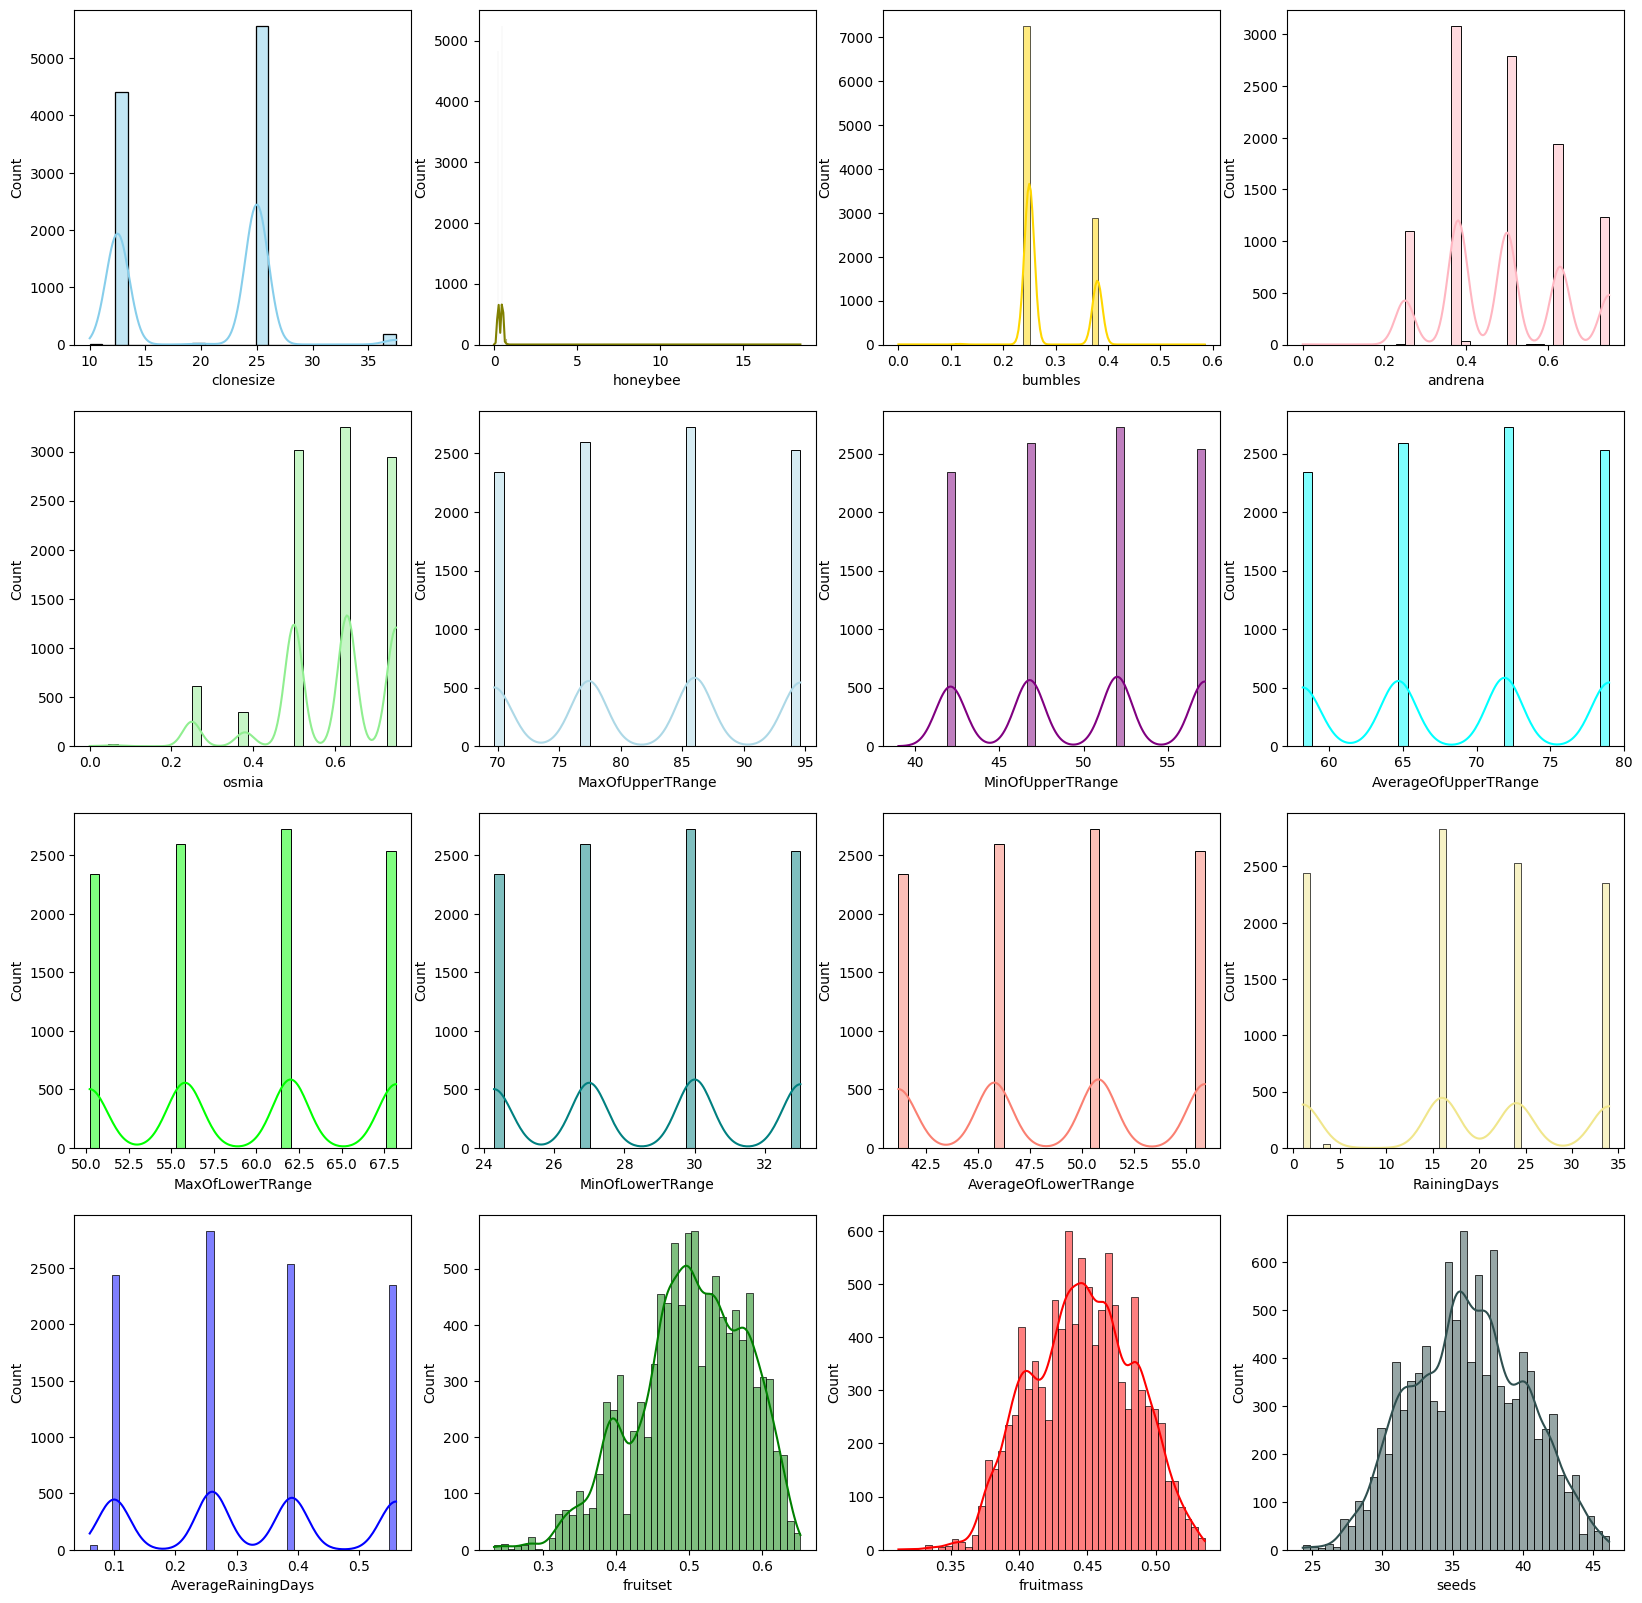

In [12]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

sns.histplot(data = test, x = test.columns[0], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data = test, x = test.columns[1], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data = test, x = test.columns[2], kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data = test, x = test.columns[3], kde=True, color="lightpink", ax=axs[0, 3])
sns.histplot(data = test, x = test.columns[4], kde=True, color="lightgreen", ax=axs[1, 0])
sns.histplot(data = test, x = test.columns[5], kde=True, color="lightblue", ax=axs[1, 1])
sns.histplot(data = test, x = test.columns[6], kde=True, color="purple", ax=axs[1, 2])
sns.histplot(data = test, x = test.columns[7], kde=True, color="aqua", ax=axs[1, 3])
sns.histplot(data = test, x = test.columns[8], kde=True, color="lime", ax=axs[2, 0])
sns.histplot(data = test, x = test.columns[9], kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data = test, x = test.columns[10], kde=True, color="salmon", ax=axs[2, 2])
sns.histplot(data = test, x = test.columns[11], kde=True, color="khaki", ax=axs[2, 3])
sns.histplot(data = test, x = test.columns[12], kde=True, color="blue", ax=axs[3, 0])
sns.histplot(data = test, x = test.columns[13], kde=True, color="green", ax=axs[3, 1])
sns.histplot(data = test, x = test.columns[14], kde=True, color="red", ax=axs[3, 2])
sns.histplot(data = test, x = test.columns[15], kde=True, color="DarkSlateGray", ax=axs[3, 3])
plt.show()

* * *
### 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">Correlation Analysis</span> <a name="corr"></a>
---


In [13]:
train.corr()

clonesize  honeybee   bumbles   andrena     osmia  \
clonesize              1.000000  0.304130  0.080433  0.065131 -0.007607   
honeybee               0.304130  1.000000 -0.017937  0.030671 -0.010394   
bumbles                0.080433 -0.017937  1.000000 -0.164962  0.158001   
andrena                0.065131  0.030671 -0.164962  1.000000  0.309556   
osmia                 -0.007607 -0.010394  0.158001  0.309556  1.000000   
MaxOfUpperTRange       0.016159  0.005840 -0.002104 -0.013061 -0.031391   
MinOfUpperTRange       0.015838  0.005755 -0.001813 -0.012928 -0.030819   
AverageOfUpperTRange   0.016057  0.005892 -0.001769 -0.012993 -0.031415   
MaxOfLowerTRange       0.016343  0.005942 -0.001613 -0.012924 -0.031398   
MinOfLowerTRange       0.016026  0.005809 -0.001804 -0.013035 -0.031486   
AverageOfLowerTRange   0.015987  0.005485 -0.001644 -0.013071 -0.031337   
RainingDays            0.165770  0.046494 -0.063294 -0.026572 -0.079874   
AverageRainingDays     0.164823  0.037532 -0.060232 -0.027193 -0.078720   
fruitset              -0.406793 -0.120492  0.160447  0.073669  0.209495   
fruitmass             -0.377688 -0.135310  0.163987  0.064722  0.192210   
seeds                 -0.396898 -0.139261  0.177022  0.063504  0.200597   
yield                 -0.382619 -0.118001  0.161145  0.073969  0.198264   

                      MaxOfUpperTRange  MinOfUpperTRange  \
clonesize                     0.016159          0.015838   
honeybee                      0.005840          0.005755   
bumbles                      -0.002104         -0.001813   
andrena                      -0.013061         -0.012928   
osmia                        -0.031391         -0.030819   
MaxOfUpperTRange              1.000000          0.998599   
MinOfUpperTRange              0.998599          1.000000   
AverageOfUpperTRange          0.999806          0.999004   
MaxOfLowerTRange              0.999503          0.998199   
MinOfLowerTRange              0.999829          0.998953   
AverageOfLowerTRange          0.999772          0.999040   
RainingDays                   0.011322          0.011727   
AverageRainingDays            0.010352          0.010767   
fruitset                      0.007580          0.008409   
fruitmass                     0.146237          0.147203   
seeds                         0.060963          0.061812   
yield                        -0.022517         -0.021929   

                      AverageOfUpperTRange  MaxOfLowerTRange  \
clonesize                         0.016057          0.016343   
honeybee                          0.005892          0.005942   
bumbles                          -0.001769         -0.001613   
andrena                          -0.012993         -0.012924   
osmia                            -0.031415         -0.031398   
MaxOfUpperTRange                  0.999806          0.999503   
MinOfUpperTRange                  0.999004          0.998199   
AverageOfUpperTRange              1.000000          0.999465   
MaxOfLowerTRange                  0.999465          1.000000   
MinOfLowerTRange                  0.999973          0.999489   
AverageOfLowerTRange              0.999974          0.999423   
RainingDays                       0.011245          0.011302   
AverageRainingDays                0.010260          0.010262   
fruitset                          0.008503          0.007902   
fruitmass                         0.147676          0.146668   
seeds                             0.062082          0.061378   
yield                            -0.021940         -0.022197   

                      MinOfLowerTRange  AverageOfLowerTRange  RainingDays  \
clonesize                     0.016026              0.015987     0.165770   
honeybee                      0.005809              0.005485     0.046494   
bumbles                      -0.001804             -0.001644    -0.063294   
andrena                      -0.013035             -0.013071    -0.026572   
osmia                        -0.031486             -

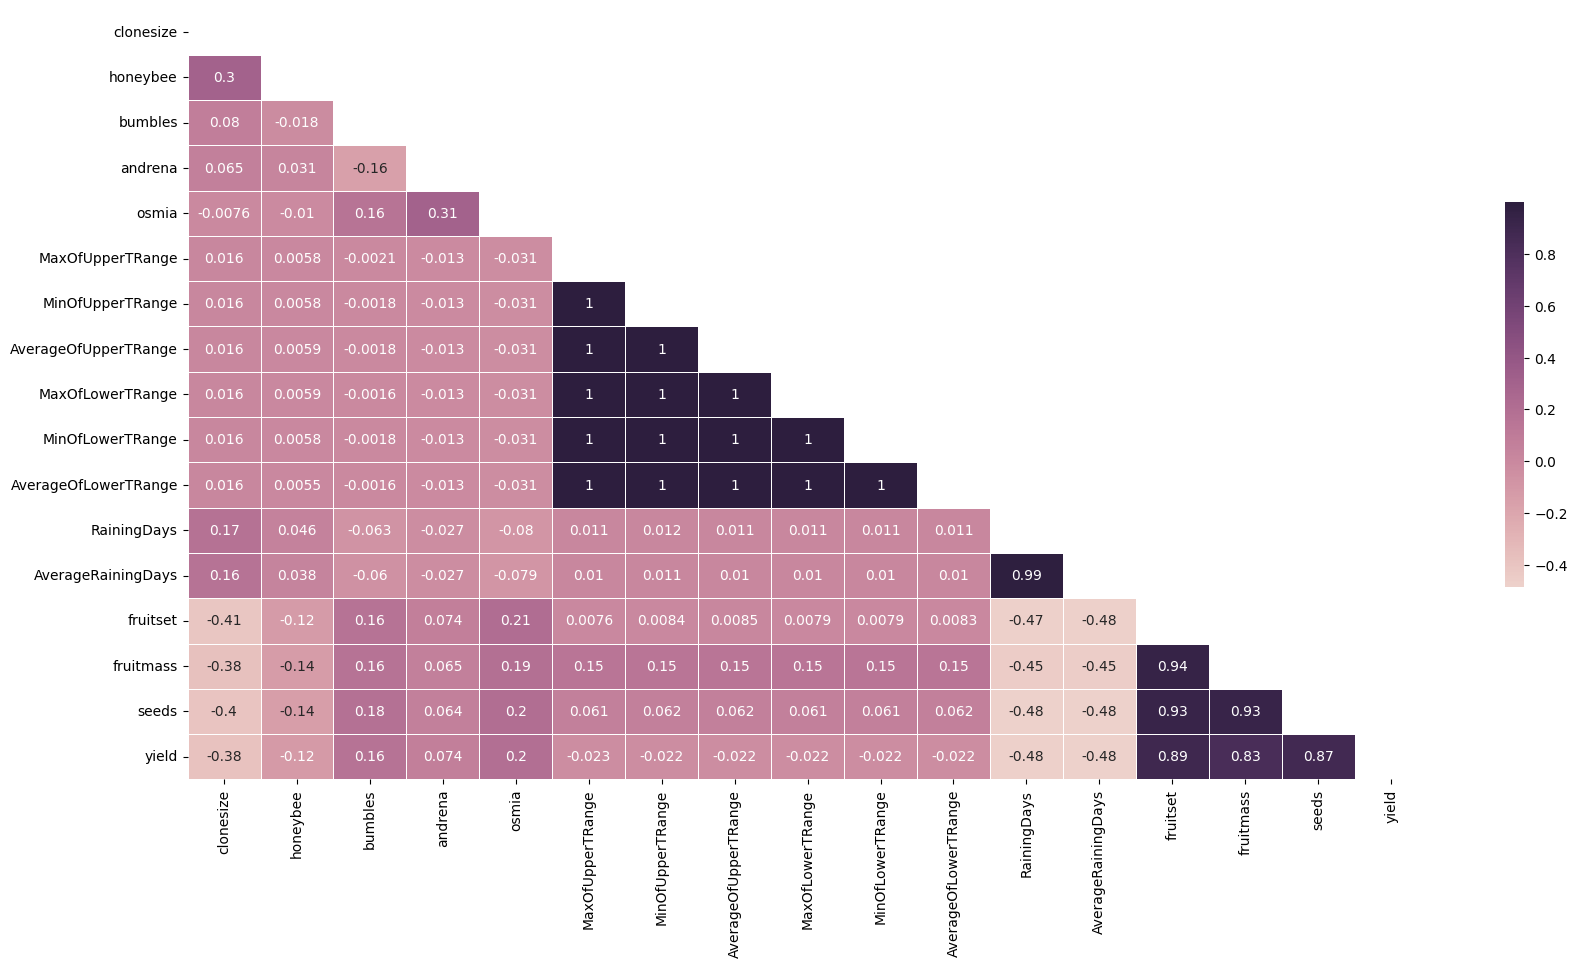

In [14]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.heatmap(train.corr() , cmap = sns.cubehelix_palette(as_cmap=True), mask=np.triu(train.corr()), linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

In [15]:
train.corr()["yield"].sort_values(ascending = False)

yield                   1.000000
fruitset                0.885967
seeds                   0.868853
fruitmass               0.826481
osmia                   0.198264
bumbles                 0.161145
andrena                 0.073969
MinOfUpperTRange       -0.021929
AverageOfUpperTRange   -0.021940
AverageOfLowerTRange   -0.022081
MaxOfLowerTRange       -0.022197
MinOfLowerTRange       -0.022319
MaxOfUpperTRange       -0.022517
honeybee               -0.118001
clonesize              -0.382619
RainingDays            -0.477191
AverageRainingDays     -0.483870
Name: yield, dtype: float64

In [16]:
test.corr()

clonesize  honeybee   bumbles   andrena     osmia  \
clonesize              1.000000  0.284055  0.090499  0.057267  0.002827   
honeybee               0.284055  1.000000  0.004051  0.024337 -0.013691   
bumbles                0.090499  0.004051  1.000000 -0.157961  0.153796   
andrena                0.057267  0.024337 -0.157961  1.000000  0.315916   
osmia                  0.002827 -0.013691  0.153796  0.315916  1.000000   
MaxOfUpperTRange       0.014973  0.010622 -0.016493 -0.009636 -0.024727   
MinOfUpperTRange       0.014969  0.010711 -0.015601 -0.008430 -0.023090   
AverageOfUpperTRange   0.015609  0.010987 -0.016291 -0.008932 -0.023975   
MaxOfLowerTRange       0.015201  0.010858 -0.016361 -0.008916 -0.024229   
MinOfLowerTRange       0.015311  0.010775 -0.016118 -0.008983 -0.023729   
AverageOfLowerTRange   0.015165  0.010629 -0.015886 -0.008880 -0.023553   
RainingDays            0.157616  0.012349 -0.079251 -0.013161 -0.062996   
AverageRainingDays     0.157116  0.007012 -0.077672 -0.012142 -0.062202   
fruitset              -0.407436 -0.106718  0.150247  0.077315  0.192000   
fruitmass             -0.377495 -0.102644  0.148575  0.073045  0.177814   
seeds                 -0.399425 -0.107096  0.166412  0.065656  0.182509   

                      MaxOfUpperTRange  MinOfUpperTRange  \
clonesize                     0.014973          0.014969   
honeybee                      0.010622          0.010711   
bumbles                      -0.016493         -0.015601   
andrena                      -0.009636         -0.008430   
osmia                        -0.024727         -0.023090   
MaxOfUpperTRange              1.000000          0.998390   
MinOfUpperTRange              0.998390          1.000000   
AverageOfUpperTRange          0.998911          0.999470   
MaxOfLowerTRange              0.998996          0.999430   
MinOfLowerTRange              0.999125          0.999577   
AverageOfLowerTRange          0.999027          0.999694   
RainingDays                  -0.002474         -0.002606   
AverageRainingDays           -0.001876         -0.001863   
fruitset                      0.009062          0.010258   
fruitmass                     0.134520          0.136548   
seeds                         0.057824          0.058944   

                      AverageOfUpperTRange  MaxOfLowerTRange  \
clonesize                         0.015609          0.015201   
honeybee                          0.010987          0.010858   
bumbles                          -0.016291         -0.016361   
andrena                          -0.008932         -0.008916   
osmia                            -0.023975         -0.024229   
MaxOfUpperTRange                  0.998911          0.998996   
MinOfUpperTRange                  0.999470          0.999430   
AverageOfUpperTRange              1.000000          0.999681   
MaxOfLowerTRange                  0.999681          1.000000   
MinOfLowerTRange                  0.999815          0.999855   
AverageOfLowerTRange              0.999805          0.999833   
RainingDays                      -0.002649         -0.003098   
AverageRainingDays               -0.001978         -0.002465   
fruitset                          0.009819          0.009528   
fruitmass                         0.136149          0.135544   
seeds                             0.058557          0.058346   

                      MinOfLowerTRange  AverageOfLowerTRange  RainingDays  \
clonesize                     0.015311              0.015165     0.157616   
honeybee                      0.010775              0.010629     0.012349   
bumbles                      -0.016118             -0.015886    -0.079251   
andrena                      -0.008983             -0.008880    -0.013161   
osmia                        -0.023729             -0.023553    -0.062996   
MaxOfUpperTRange              0.999125              0.999027    -0.002474   
MinOfUpperTRange              0.999577              0.999694    -0.002606   
AverageOfUpperTRange

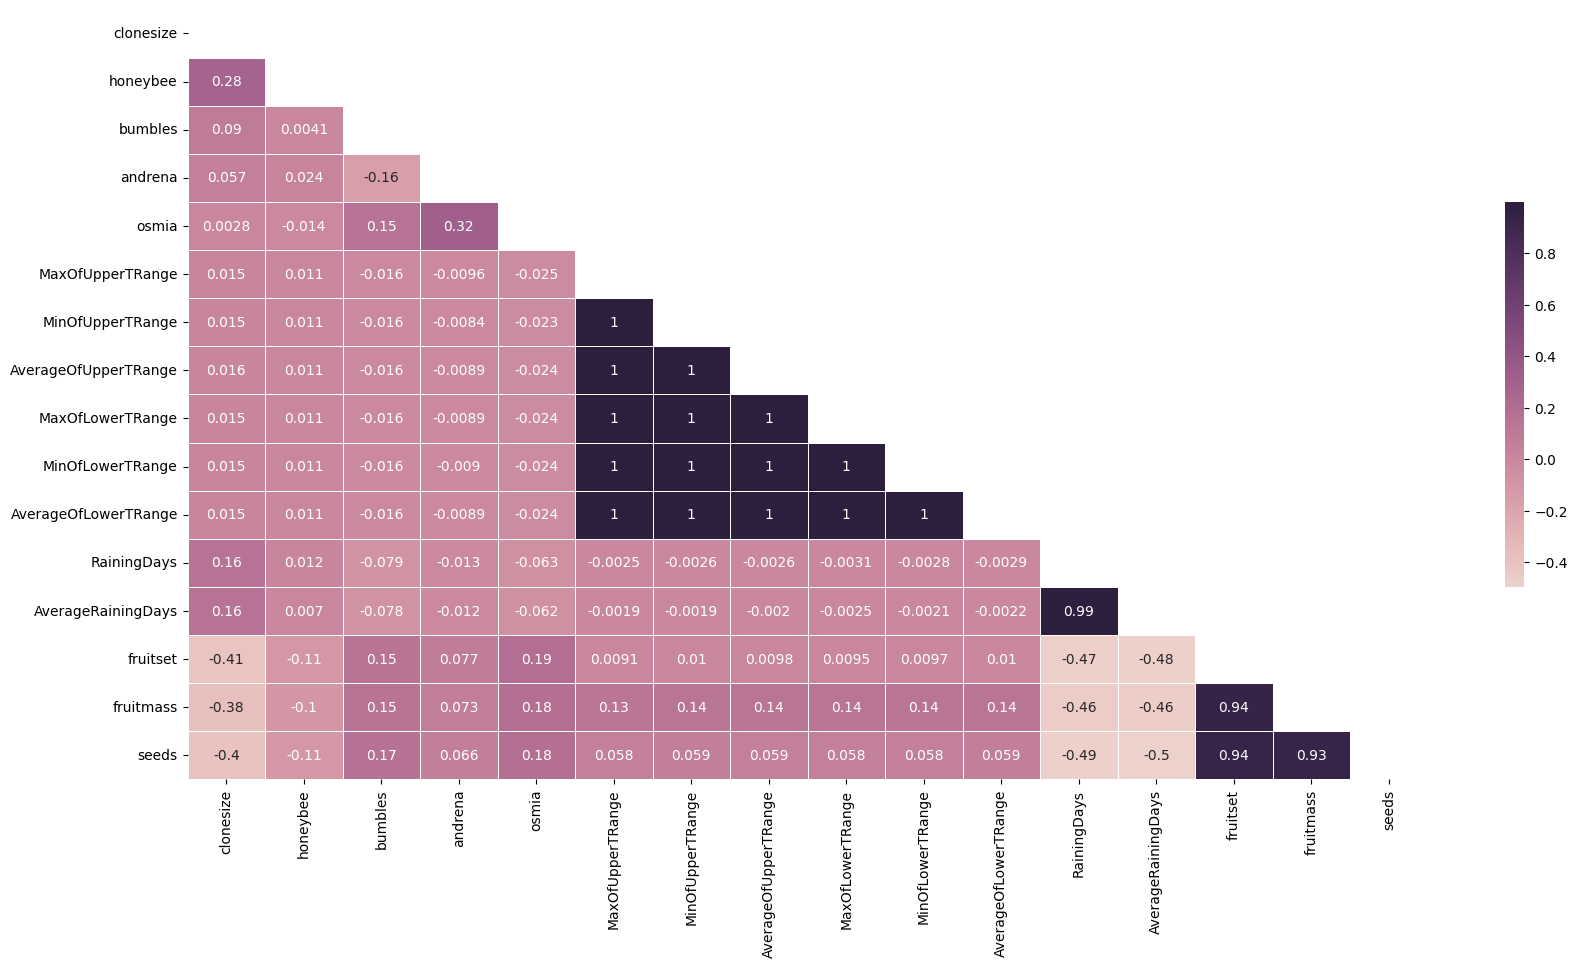

In [17]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.heatmap(test.corr() , cmap = sns.cubehelix_palette(as_cmap=True), mask=np.triu(test.corr()), linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

* * *
### 🔎 <span style="color: DarkGreen; font-family:Times New Roman;">Feature Interactions</span> <a name="feature-interactions"></a>
---


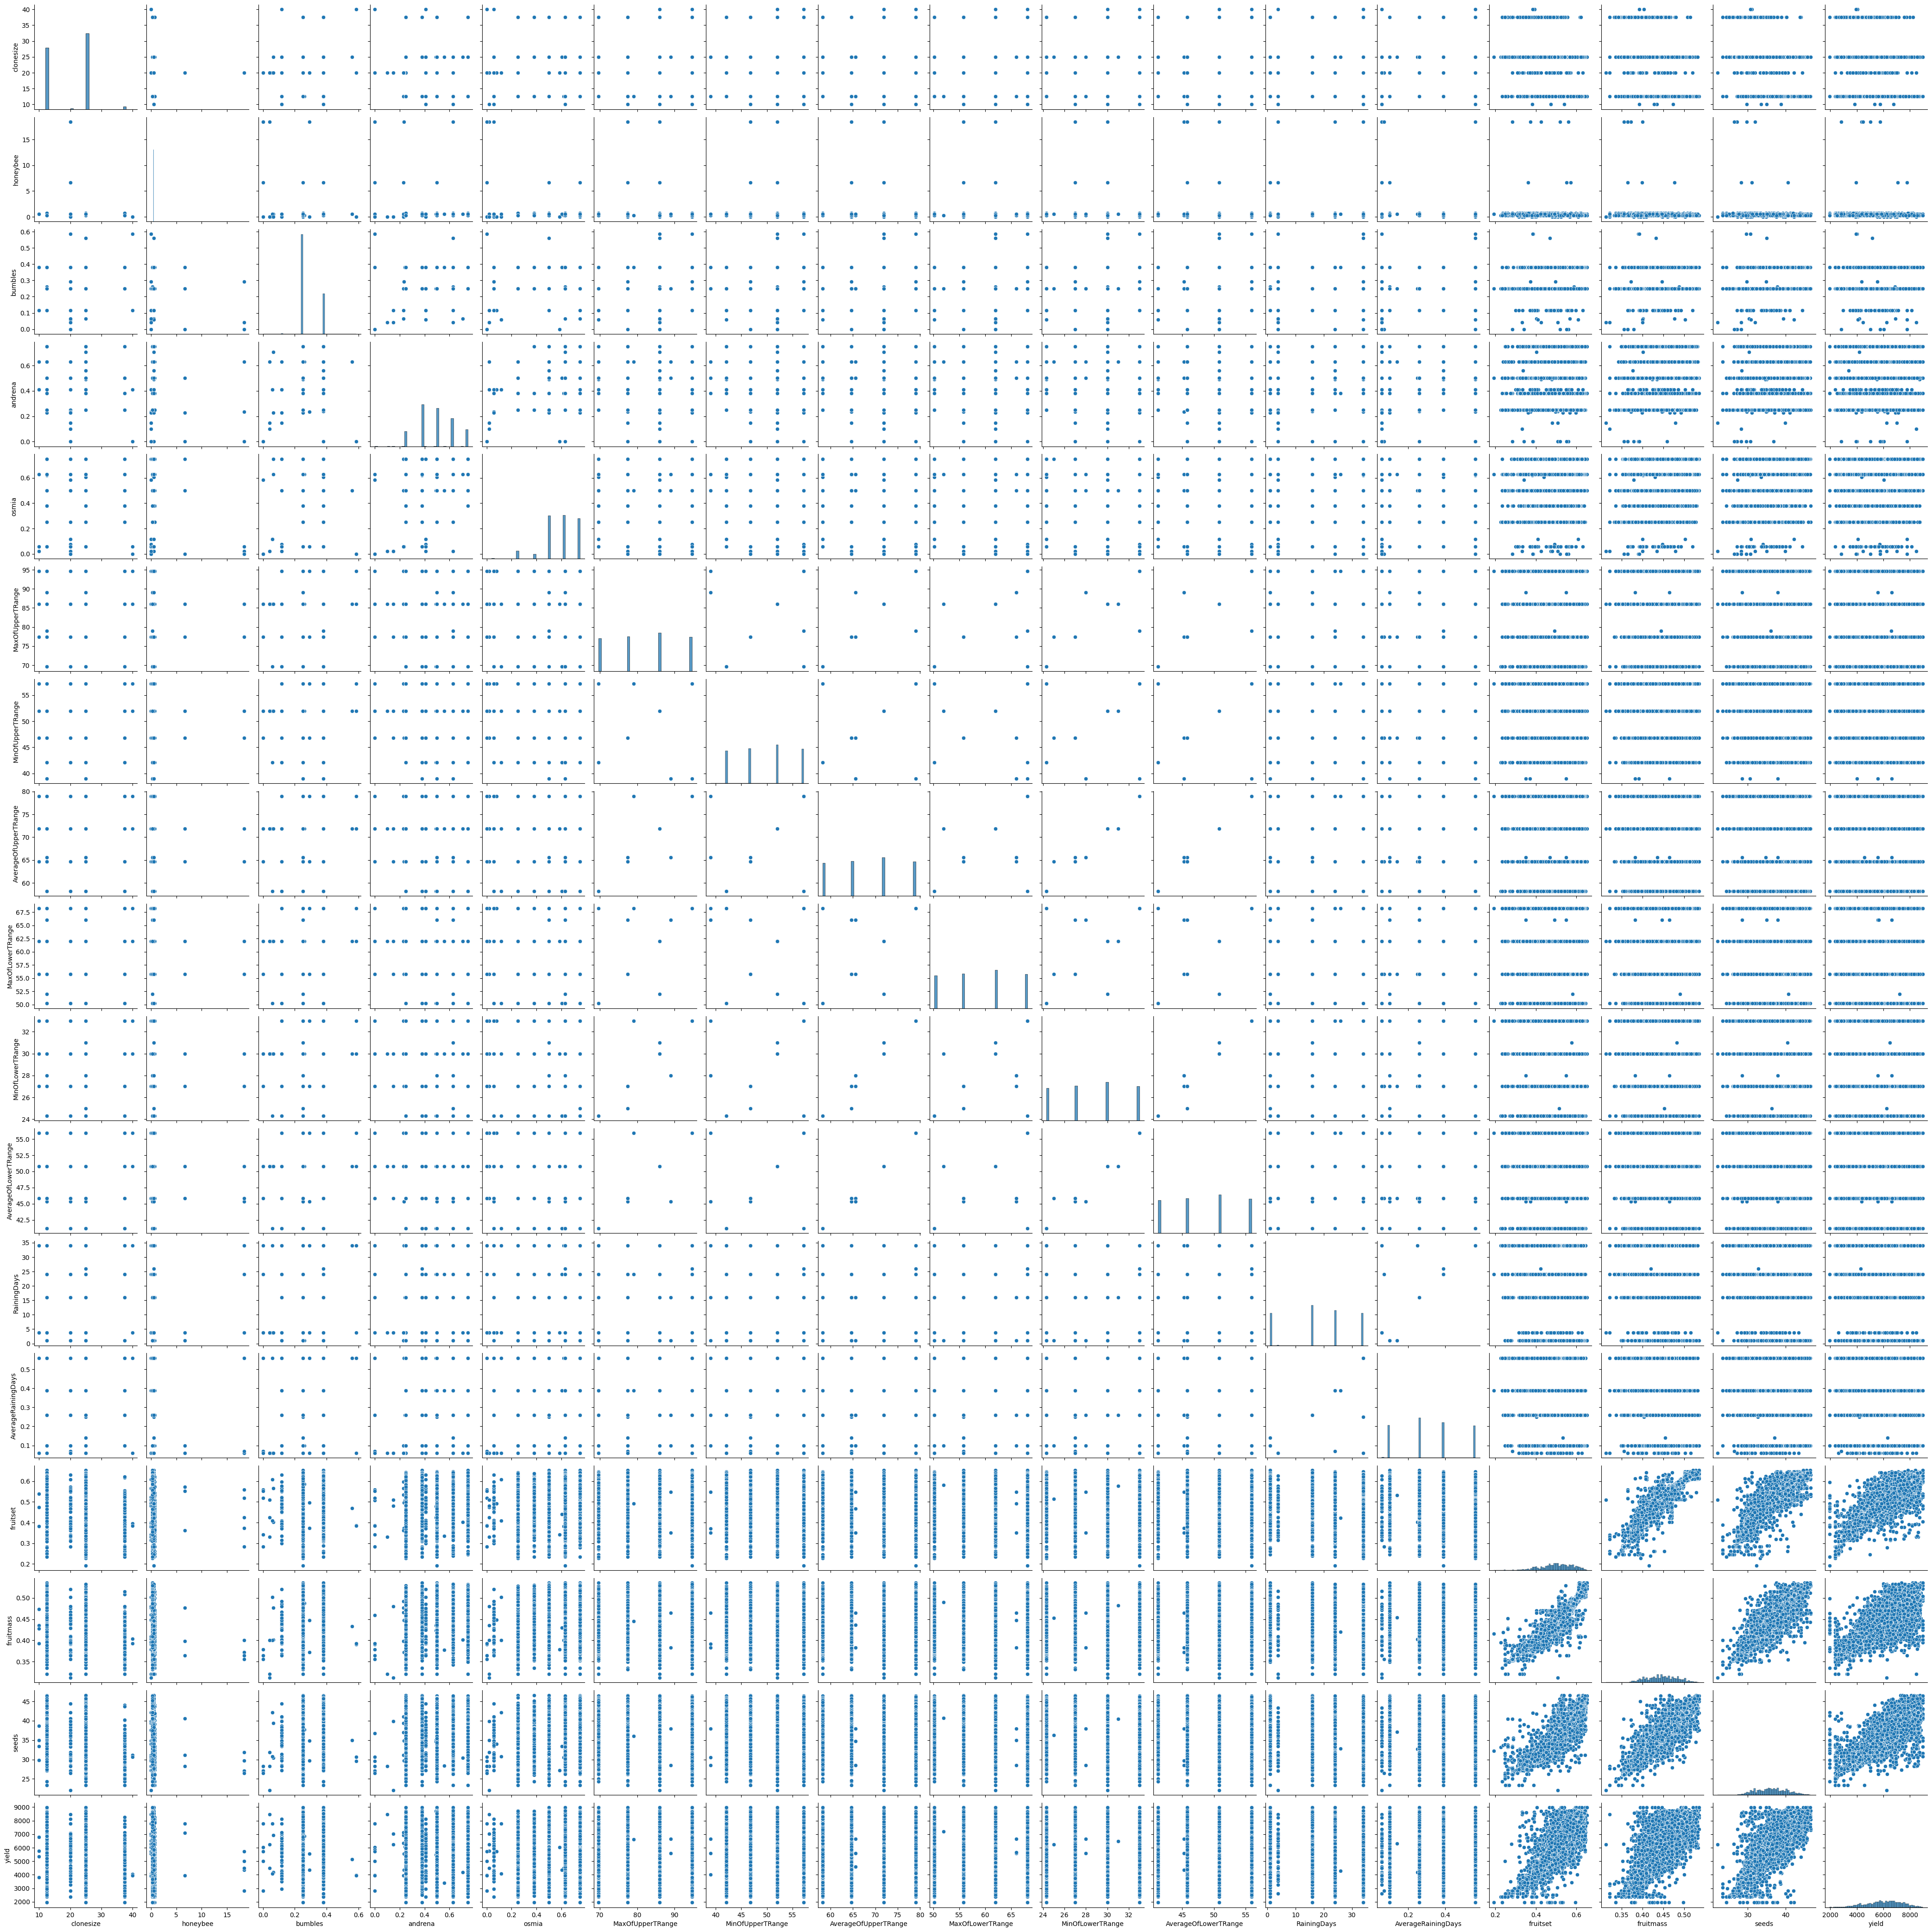

In [18]:
sns.pairplot(train)
plt.show()

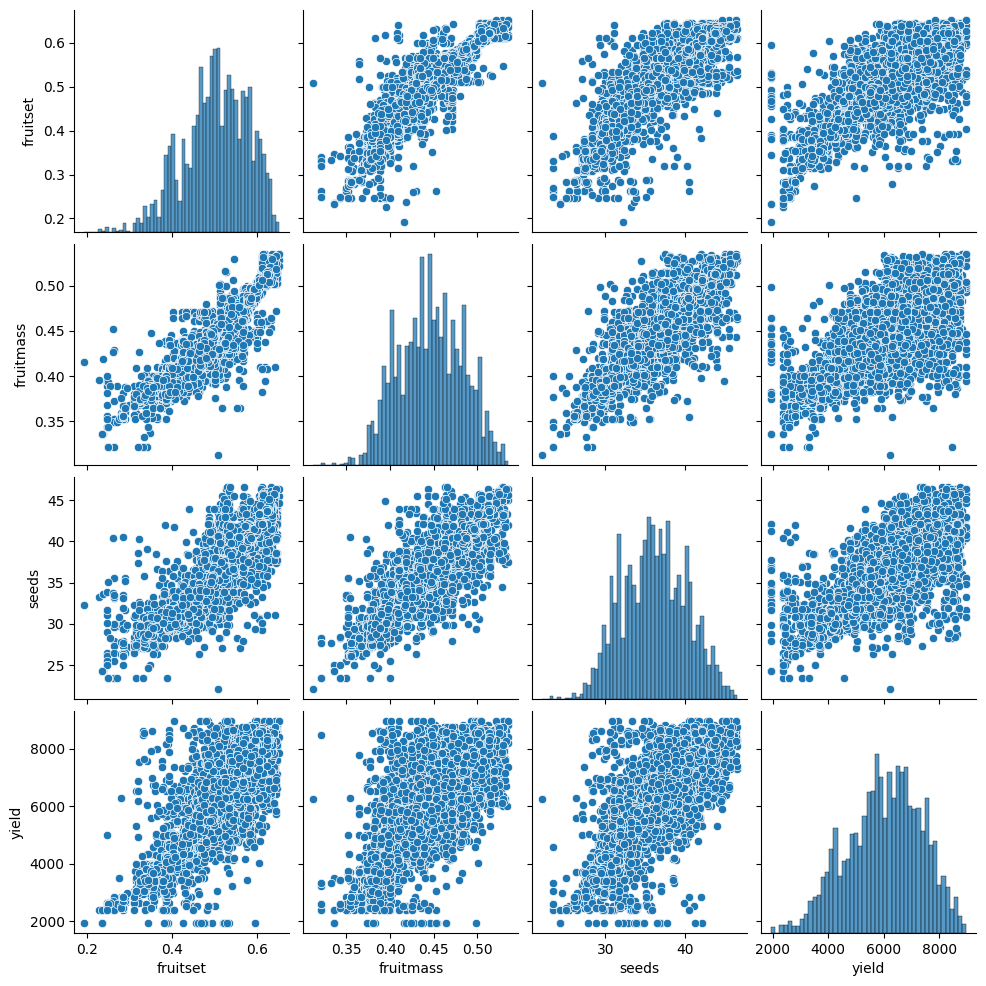

In [19]:
sns.pairplot(train.iloc[:,-4:])
plt.show()

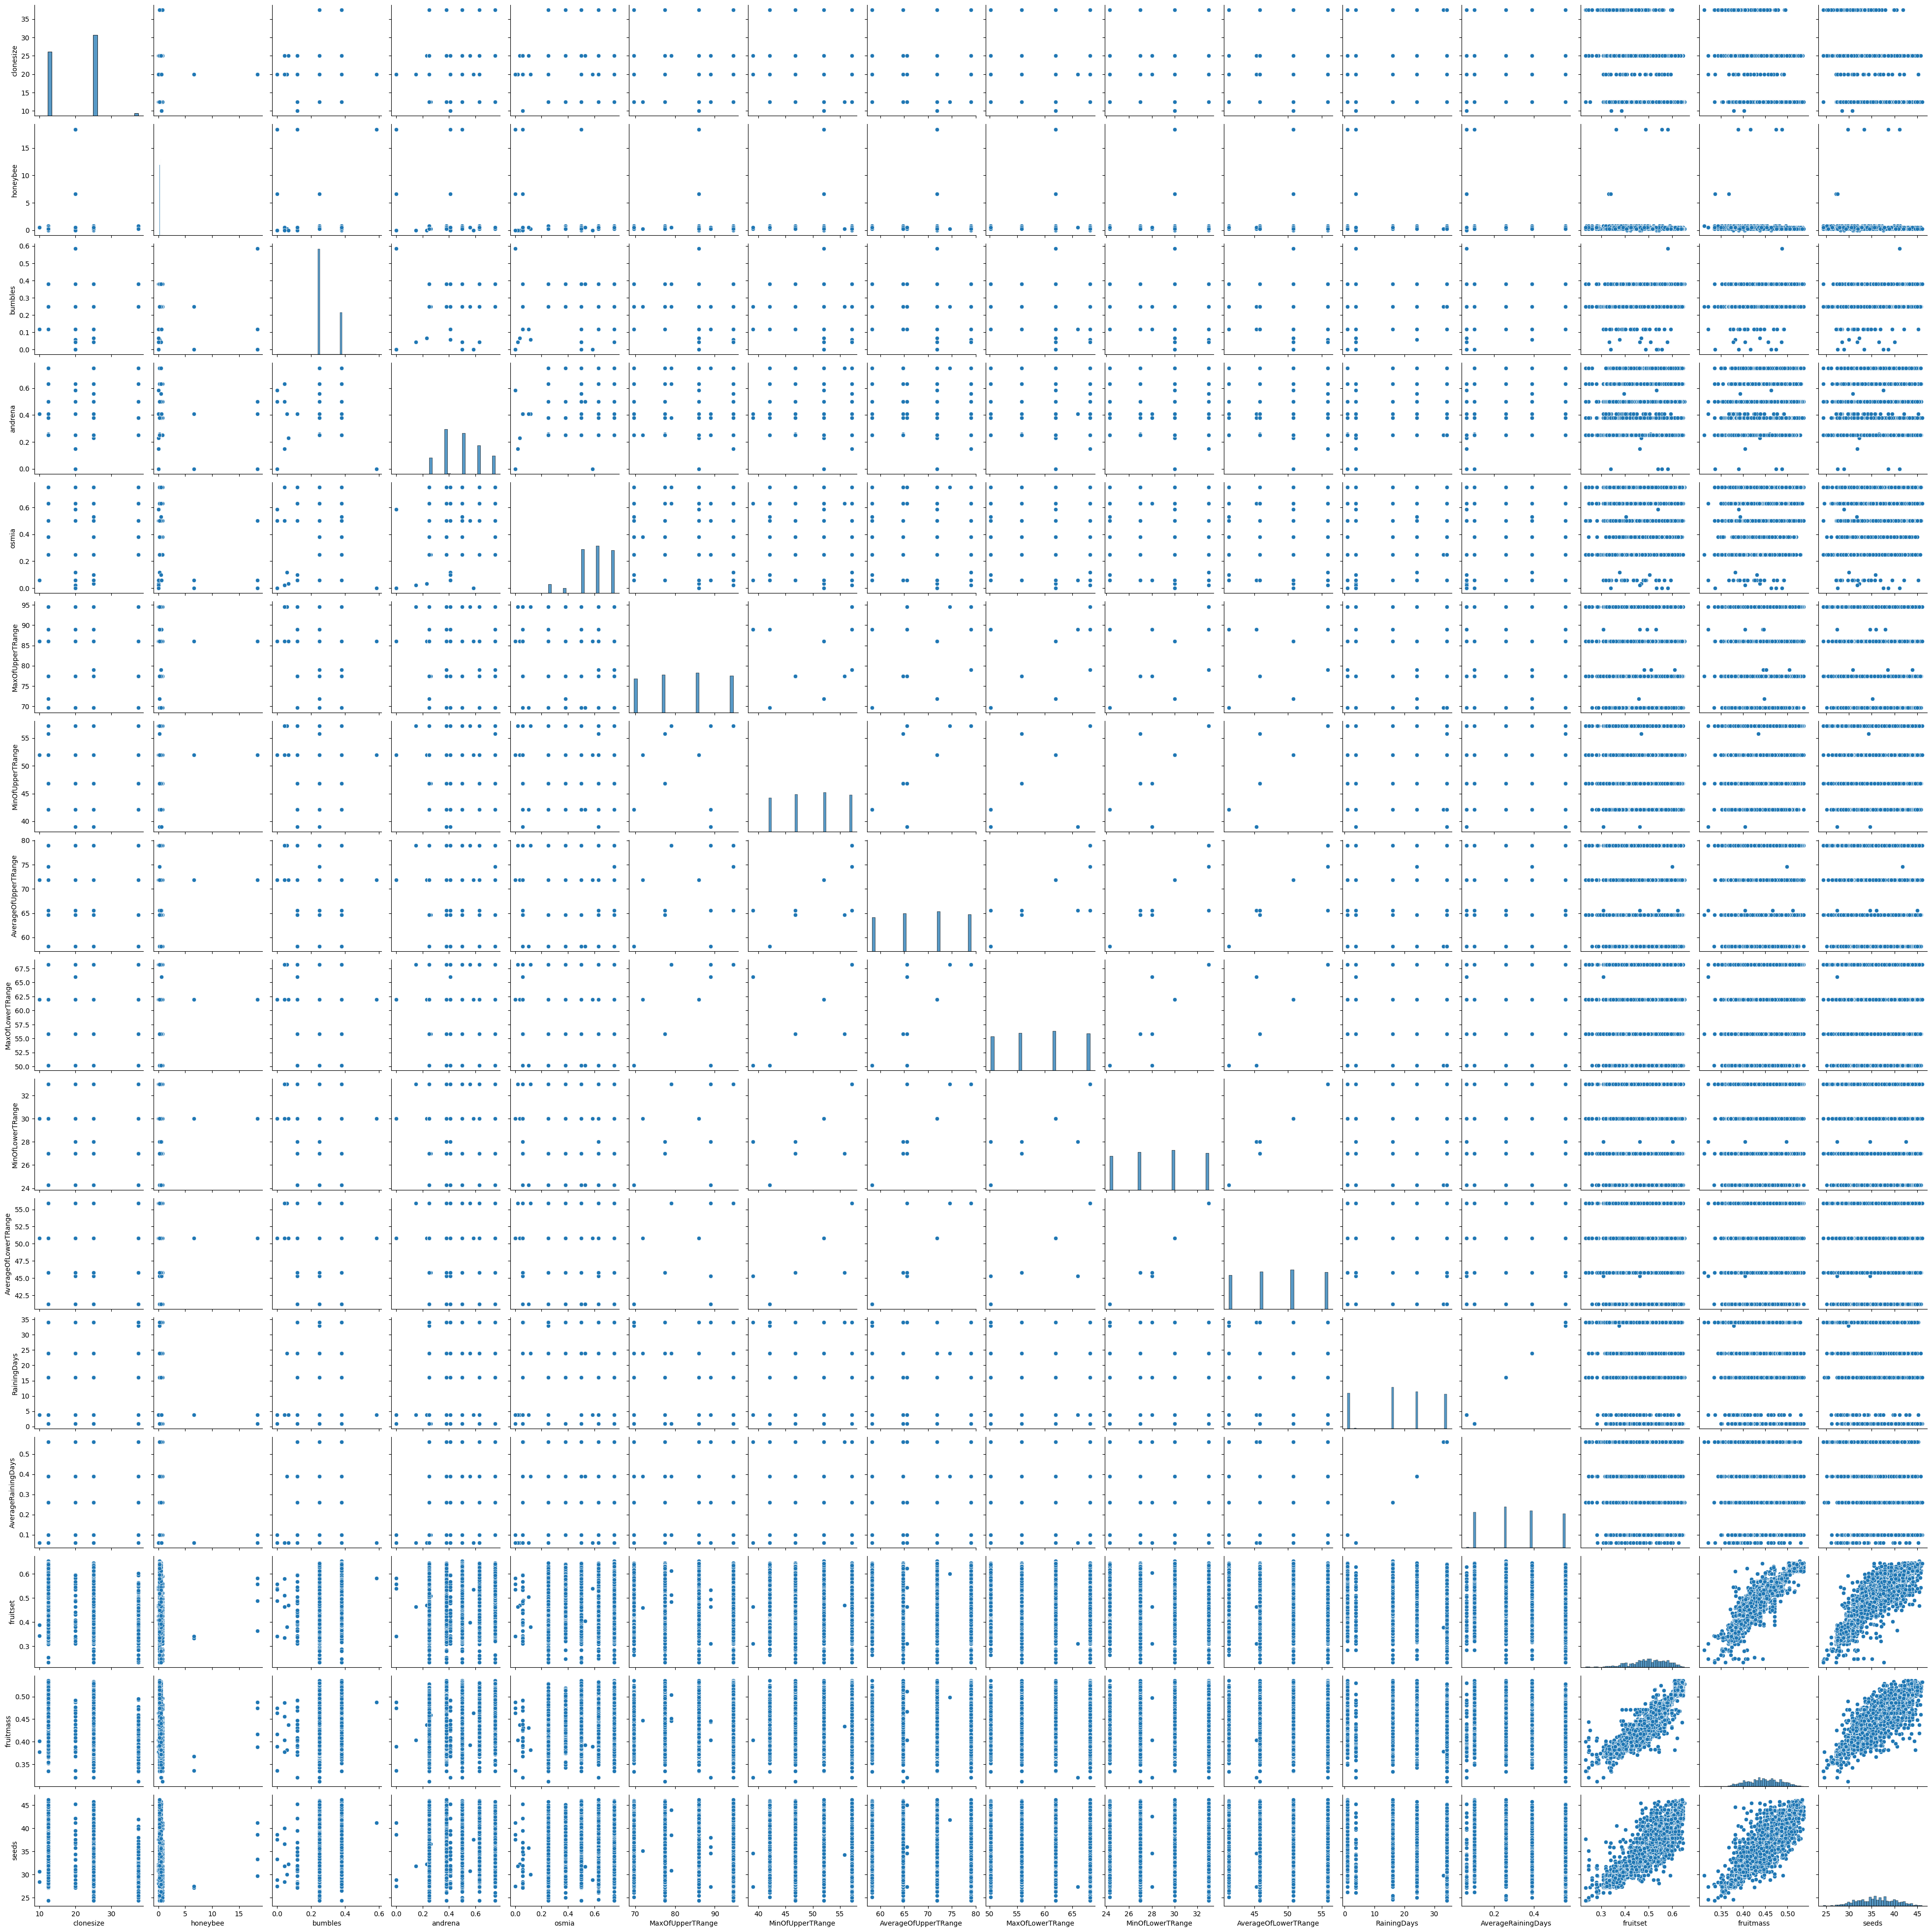

In [20]:
sns.pairplot(test)
plt.show()

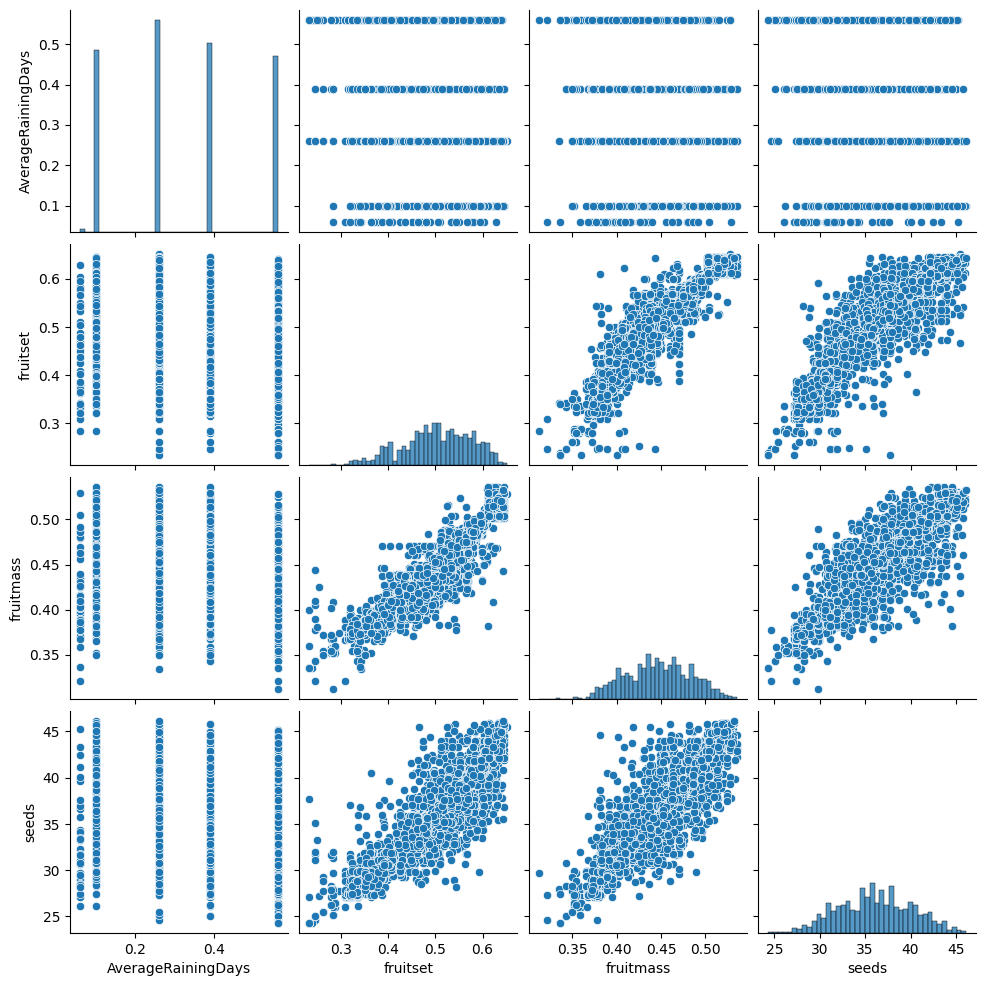

In [21]:
sns.pairplot(test.iloc[:,-4:])
plt.show()

**[⬆️Back to Table of Contents ⬆️](#toc)**

* * *
## ⚙️ <span style="color: DarkGreen; font-family:Times New Roman;">Feature Engineering</span> <a name="feature-engineering"></a>
---


* * *
### ⚙️ <span style="color: DarkGreen; font-family:Times New Roman;">Dimensionality Reduction</span> <a name="dimensionality-reduction"></a>
---


In [22]:
train.corr()["MaxOfUpperTRange"].sort_values(ascending = False)

MaxOfUpperTRange        1.000000
MinOfLowerTRange        0.999829
AverageOfUpperTRange    0.999806
AverageOfLowerTRange    0.999772
MaxOfLowerTRange        0.999503
MinOfUpperTRange        0.998599
fruitmass               0.146237
seeds                   0.060963
clonesize               0.016159
RainingDays             0.011322
AverageRainingDays      0.010352
fruitset                0.007580
honeybee                0.005840
bumbles                -0.002104
andrena                -0.013061
yield                  -0.022517
osmia                  -0.031391
Name: MaxOfUpperTRange, dtype: float64

It seems that the columns related to temperature **`(MaxOfUpperTRange, MinOfLowerTRange, AverageOfUpperTRange, AverageOfLowerTRange, MaxOfLowerTRange, MinOfUpperTRange)`** are highly correlated with each other, with correlation coefficients close to 1.0. In this case, keeping only one representative column, such as **`MaxOfUpperTRange`**, can be a reasonable approach to reduce redundancy and multicollinearity in the dataset.

In [23]:
train.drop(["MinOfUpperTRange", "AverageOfUpperTRange", "AverageOfLowerTRange", "MaxOfLowerTRange", "MinOfLowerTRange"], axis = 1, inplace = True) 
test.drop(["MinOfUpperTRange", "AverageOfUpperTRange", "AverageOfLowerTRange", "MaxOfLowerTRange", "MinOfLowerTRange"], axis = 1, inplace = True) 


---

In [24]:
train.corr()["RainingDays"].sort_values(ascending = False)

RainingDays           1.000000
AverageRainingDays    0.990864
clonesize             0.165770
honeybee              0.046494
MaxOfUpperTRange      0.011322
andrena              -0.026572
bumbles              -0.063294
osmia                -0.079874
fruitmass            -0.447033
fruitset             -0.468066
yield                -0.477191
seeds                -0.478818
Name: RainingDays, dtype: float64

In [25]:
train.corr()["yield"].sort_values(ascending = False)

yield                 1.000000
fruitset              0.885967
seeds                 0.868853
fruitmass             0.826481
osmia                 0.198264
bumbles               0.161145
andrena               0.073969
MaxOfUpperTRange     -0.022517
honeybee             -0.118001
clonesize            -0.382619
RainingDays          -0.477191
AverageRainingDays   -0.483870
Name: yield, dtype: float64

Since the target column **`(yield)`** has a higher correlation with **`AverageRainingDays`** (-0.483870) compared to **`RainingDays`** (-0.477191), it would be a reasonable choice to keep **`AverageRainingDays`** and drop RainingDays. By doing so, retained the information related to average raining days while removing a highly correlated column that provides similar information.

In [26]:
train.drop(["RainingDays"], axis = 1, inplace = True) 
test.drop(["RainingDays"], axis = 1, inplace = True) 

---

In [27]:
train.corr()["fruitset"].sort_values(ascending = False)

fruitset              1.000000
fruitmass             0.936988
seeds                 0.929654
yield                 0.885967
osmia                 0.209495
bumbles               0.160447
andrena               0.073669
MaxOfUpperTRange      0.007580
honeybee             -0.120492
clonesize            -0.406793
AverageRainingDays   -0.475876
Name: fruitset, dtype: float64

In [28]:
train.corr()["yield"].sort_values(ascending = False)

yield                 1.000000
fruitset              0.885967
seeds                 0.868853
fruitmass             0.826481
osmia                 0.198264
bumbles               0.161145
andrena               0.073969
MaxOfUpperTRange     -0.022517
honeybee             -0.118001
clonesize            -0.382619
AverageRainingDays   -0.483870
Name: yield, dtype: float64

It appears that the columns **`fruitmass`**, **`fruitset`**, and **`seeds`** are highly correlated with each other, with correlation coefficients of approximately **`0.93`**. Among these three columns, **`fruitset`** has the highest correlation with the target column **`(yield)`** at 0.885967.

In [29]:
train.drop(["fruitmass","seeds"], axis = 1, inplace = True) 
test.drop(["fruitmass","seeds"], axis = 1, inplace = True) 

* * *
### ⚙️ <span style="color: DarkGreen; font-family:Times New Roman;">Standardization</span> <a name="standardization"></a>
---


In [30]:
def scaling(feature):
    global X_train, X_test
    scaler = MinMaxScaler()
    scaler.fit
    scaler.fit(X_train[feature].to_numpy().reshape(-1,1))
    X_train[feature] = scaler.transform(X_train[feature].to_numpy().reshape(-1,1))
    X_test[feature] = scaler.transform(X_test[feature].to_numpy().reshape(-1,1))

In [31]:
# scale_needed_features = [
# "MaxOfUpperTRange",
# "MinOfUpperTRange",
# "AverageOfUpperTRange",
# "MaxOfLowerTRange",
# "MinOfLowerTRange",
# "AverageOfLowerTRange",
# "RainingDays",
# "seeds" ]

scale_needed_features = [
"MaxOfUpperTRange"]

**[⬆️Back to Table of Contents ⬆️](#toc)**

* * *
## 🧑‍🔬 <span style="color: DarkGreen; font-family:Times New Roman;">Model Selection</span> <a name="model-selection"></a>
---


In [32]:
if model_selection == True:
    X = train.drop(["yield"], axis = 1)
    y = train[["yield"]]
    list_mae_rfr = []
    list_mae_lr = []
    list_mae_xgb = []


    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state = i)

        for feature in scale_needed_features:
            scaling(feature)

        # Random Forest
        rfr = RandomForestRegressor(random_state = RS)
        rfr.fit(X_train,y_train.values.ravel())
        rfr_prediction = rfr.predict(X_test)
        mae_rfr = mean_absolute_error(y_test,rfr_prediction)
        list_mae_rfr.append(mae_rfr)

        # Linear Regression
        lr = LinearRegression()
        lr.fit(X_train,y_train)
        lr_prediction = lr.predict(X_test)
        mae_lr = mean_absolute_error(y_test,lr_prediction)
        list_mae_lr.append(mae_lr)

        # XGBoost
        xgb = XGBRegressor(random_state = RS, max_depth = 3, n_estimators= 100)
        xgb.fit(X_train,y_train)
        xgb_prediction = xgb.predict(X_test)
        mae_xgb = mean_absolute_error(y_test,xgb_prediction)
        list_mae_xgb.append(mae_xgb)



    print(f"Mean RFR 100-FOLD: {np.mean(list_mae_rfr)}")
    print(f"Median RFR 100-FOLD: {np.median(list_mae_rfr)}")

    print(f"Mean LR 100-FOLD: {np.mean(list_mae_lr)}")
    print(f"Median LR 100-FOLD: {np.median(list_mae_lr)}")

    print(f"Mean XGB 100-FOLD: {np.mean(list_mae_xgb)}")
    print(f"Median XGB 100-FOLD: {np.median(list_mae_xgb)}")

XGBoost was chosen over Random Forest Regressor and Linear Regression based on the mean and median of the 100-fold mean absolute error (MAE) of these models. The evaluation of the models revealed that XGBoost had the lowest MAE, indicating better predictive performance compared to the other two models.

Additionally, the performance of XGBoost was observed to be fast, which is advantageous when working with larger datasets or requiring quicker model iterations. This efficiency in training and prediction times further contributed to the decision of selecting XGBoost as the preferred model.


**[⬆️Back to Table of Contents ⬆️](#toc)**

* * *
## 🧫 <span style="color: DarkGreen; font-family:Times New Roman;">Final Evaluation</span> <a name="final-evaluation"></a>
---


In [33]:
X_train = train.drop(["yield"], axis = 1)
y_train = train[["yield"]]

X_test = test.copy()

for feature in scale_needed_features:
    scaling(feature)

xgb_final = XGBRegressor(random_state = RS, max_depth = 3, n_estimators= 100,eval_metric = "mae")
xgb_final.fit(X_train,y_train)
xgb_final_prediction = xgb_final.predict(X_test)

**[⬆️Back to Table of Contents ⬆️](#toc)**

* * *
## 📋 <span style="color: DarkGreen; font-family:Times New Roman;">Result</span> <a name="result"></a>
---


In [34]:
result = pd.DataFrame({
    "yield" : xgb_final_prediction
}).set_index(X_test.index)

In [35]:
result

yield
id                
15289  4202.810059
15290  6048.218262
15291  7223.557129
15292  4689.556152
15293  3796.140869
...            ...
25478  5376.573242
25479  5651.451660
25480  6809.795898
25481  4381.233398
25482  7201.355957

[10194 rows x 1 columns]

In [36]:
result.to_csv("output.csv")

In [37]:
# Author: amyrmahdy
# Date: 12 May 2023

**[⬆️Back to Table of Contents ⬆️](#toc)**

* * *
# 📕 **<span style="color: DarkGreen; font-family:Times New Roman;">CONCLUSION</span>**  <a name="conclusion"></a>
---


In conclusion, this notebook explored the task of predicting crop yield using machine learning techniques. The dataset provided valuable features related to fruit set, seeds, and weather conditions, which were crucial in understanding and predicting crop productivity.

Through extensive data analysis and preprocessing, we gained insights into the relationships between variables and prepared the data for modeling. Three regression models, namely Random Forest, Linear Regression, and XGBoost, were trained and evaluated using a 100-fold cross-validation strategy.

After evaluating the models based on mean absolute error (MAE), XGBoost emerged as the top-performing model, exhibiting the lowest MAE among the three. This superior performance, coupled with its fast execution time, led to the selection of XGBoost as the final model for predicting crop yield.

The chosen model, XGBoost, offers high predictive accuracy, robustness to overfitting, and the ability to handle complex relationships within the data. The feature importance analysis provided valuable insights into the key factors influencing crop productivity.

By leveraging XGBoost, we can make reliable predictions on the test dataset and contribute to the field of agriculture by optimizing crop yield. The results of this notebook demonstrate the effectiveness of machine learning in agricultural applications and open avenues for further research and exploration in this domain.

Overall, this notebook serves as a valuable resource for understanding and implementing machine learning techniques in predicting crop yield, showcasing the importance of feature engineering, model selection, and evaluation in agricultural analytics.

**[⬆️Back to Table of Contents ⬆️](#toc)**